In [172]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
path = "/"  #Insert path here
database = path + 'database.sqlite'

In [173]:
conn = sqlite3.connect("Downloads/database_europe/database.sqlite")

country = pd.read_sql("""SELECT *
                        FROM Country""", conn)
country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [174]:
player = pd.read_sql("""SELECT * 
                         FROM Player """, conn)
player

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


In [175]:
player[player['player_api_id']==148286]

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
4959,4965,148286,Joachim Mununga,176107,1988-06-30 00:00:00,177.8,174


C:\Users\muneeb.ahmad\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='height'>

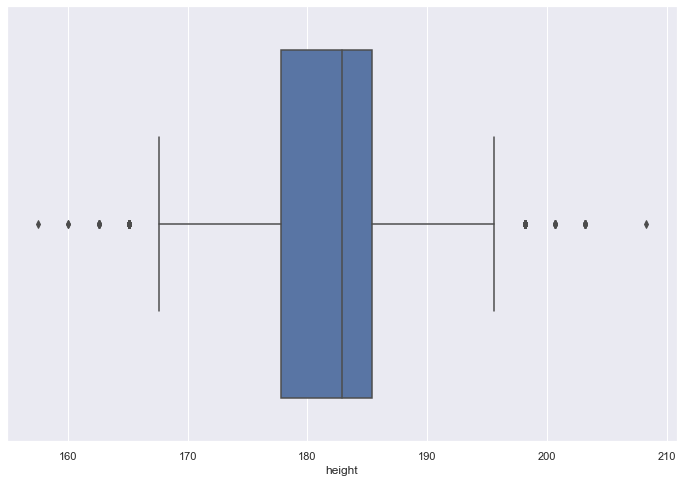

In [176]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.boxplot(player['height'])

In [177]:
player.isnull().sum()

id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

C:\Users\muneeb.ahmad\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='weight'>

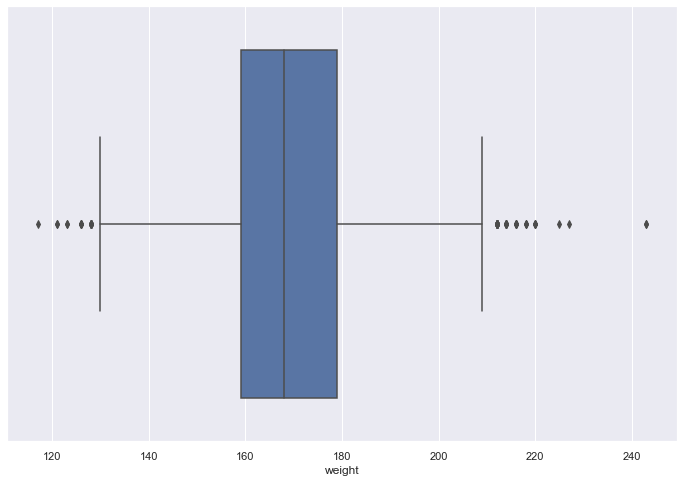

In [178]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.boxplot(player['weight'])

In [179]:
player.describe()

,id,player_api_id,player_fifa_api_id,height,weight
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000
mean,5537.511392,156582.427215,165664.910488,181.867445,168.380289
std,3197.692647,160713.700624,58649.928360,6.369201,14.990217
min,1.000000,2625.000000,2.000000,157.480000,117.000000
25%,2767.750000,35555.500000,151889.500000,177.800000,159.000000
50%,5536.500000,96619.500000,184671.000000,182.880000,168.000000
75%,8306.250000,212470.500000,203883.250000,185.420000,179.000000
max,11075.000000,750584.000000,234141.000000,208.280000,243.000000


In [180]:
fig = px.scatter(player, x='weight' , y='height',title='weight vs height')
fig.update_xaxes(title='Weight')
fig.update_yaxes(title="Height")
fig.show()
#pos

In [181]:
player_data = pd.read_sql("""SELECT 
                                P.player_name as player_name,
                                P.weight as weight,
                                P.height as height,
                                PA.overall_rating as overall_rating,
                                PA.preferred_foot as prefered_foot,
                                PA.attacking_work_rate as attacking_work_rate,
                                PA.defensive_work_rate as defensive_work_rate
                            FROM Player AS P
                            JOIN Player_Attributes AS PA ON PA.player_api_id = P.player_api_id
                            WHERE date between '2015-08-01' and '2016-05-31'
                            """,conn)

In [182]:
player_data['attacking_work_rate'].unique()

array(['medium', 'high', 'low', 'None', None], dtype=object)

In [183]:
player_data['defensive_work_rate'].unique()

array(['medium', 'high', '5', 'low', '1', None, '0', '2', '6', '3', '9',
       '4', '7', '8'], dtype=object)

In [184]:
player_data = player_data.drop_duplicates(subset=['player_name'],keep='last',ignore_index=True)

In [185]:
player_data= player_data[(player_data.defensive_work_rate=='medium') | (player_data.defensive_work_rate=='high') | (player_data.defensive_work_rate=='low')]

In [186]:
player_data = player_data[(player_data.weight>=130) &( player_data.weight<211) & (player_data.height>=168)&(player_data.height<196)]

In [187]:
player_data.dropna(inplace=True)

C:\Users\muneeb.ahmad\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='height'>

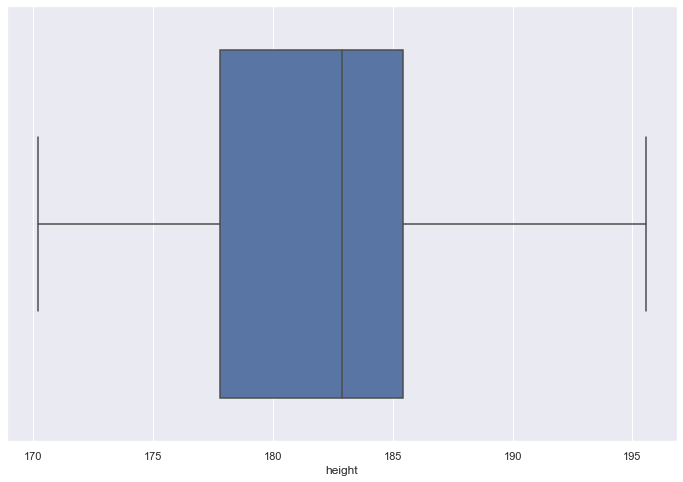

In [188]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.boxplot(player_data['height'])

C:\Users\muneeb.ahmad\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='weight', ylabel='height'>

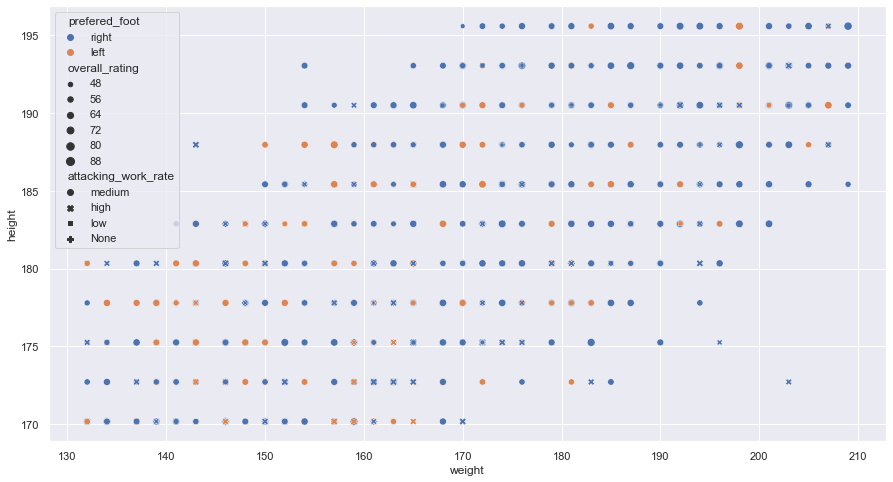

In [189]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(player_data['weight'],player_data['height'],hue = player_data['prefered_foot'],style=player_data['attacking_work_rate'],size=player_data['overall_rating'])

In [190]:
fig = px.scatter(player_data, x='weight' , y='height',title='weight vs height',color='prefered_foot',symbol='defensive_work_rate')
fig.update_xaxes(title='Weight')
fig.update_yaxes(title="Height")
fig.show()

In [191]:
fig = px.scatter(player_data, x='weight' , y='height',title='weight vs height',color='prefered_foot',symbol='attacking_work_rate')
fig.update_xaxes(title='Weight')
fig.update_yaxes(title="Height")
fig.show()

In [192]:
player_data_15_16 = pd.read_sql("""SELECT 
                                P.player_name as player_name,
                                P.weight as weight,
                                P.height as height,
                                PA.overall_rating as overall_rating,
                                PA.preferred_foot as prefered_foot,
                                PA.attacking_work_rate as attacking_work_rate,
                                PA.defensive_work_rate as defensive_work_rate
                            FROM Player AS P
                            JOIN Player_Attributes AS PA ON PA.player_api_id = P.player_api_id
                            """,conn)

In [193]:
player_data_15_16 = player_data_15_16.drop_duplicates(subset=['player_name'],keep='last',ignore_index=True)

In [194]:
left_players=0
right_players=0

for i,row in player_data_15_16.iterrows():
    foot = row['prefered_foot']
    if foot=='left':
        left_players = left_players+1
    elif foot == 'right':
        right_players = right_players+1
        
        

In [195]:
left_players

2300

In [196]:
right_players

7829

In [197]:
fig = px.scatter(player_data, x='weight' , y='height',title='weight vs height')
fig.update_xaxes(title='Weight')
fig.update_yaxes(title="Height")
fig.show()